In [2]:
import os
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
warnings.filterwarnings('ignore')


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    #pythonhashseed 환경변수 설정
    np.random.seed(seed)
    
    
seed_everything(8812)

light_df = pd.read_csv('./data/external_open/대구 보안등 정보.csv', encoding='cp949')[['설치개수', '소재지지번주소']]

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'
#공백으로 구분된 네 개의 비공백 문자열을 찾음

light_df[['도시', '구', '동', '번지']] = light_df['소재지지번주소'].str.extract(location_pattern)
light_df = light_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
# 비교해보니 직접 동 별로 평균 계산 한 값과 동일했습니다
light_df = light_df.groupby(['도시', '구', '동']).mean().reset_index()
light_df.reset_index(inplace=True, drop=True)


child_area_df = pd.read_csv('./data/external_open/대구 어린이 보호 구역 정보.csv', encoding='cp949')[['소재지지번주소']]
#중복된 값이 있으면 값이 겹칠 수 있으니 미리 중복 제거 
child_area_df['School Zone'] = 1

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

child_area_df[['도시', '구', '동', '번지']] = child_area_df['소재지지번주소'].str.extract(location_pattern)
child_area_df = child_area_df.drop(columns=['소재지지번주소', '번지'])


# Sum -> Mean으로 변경
child_area_df = child_area_df.groupby(['도시', '구', '동']).mean().reset_index()
child_area_df.reset_index(inplace=True, drop=True)


parking_df = pd.read_csv('./data/external_open/대구 주차장 정보.csv', encoding='cp949')[['소재지지번주소', '급지구분']]
parking_df = pd.get_dummies(parking_df, columns=['급지구분'])
#parking_df값들을 one_hot encoding으로 진행

location_pattern = r'(\S+) (\S+) (\S+) (\S+)'

parking_df[['도시', '구', '동', '번지']] = parking_df['소재지지번주소'].str.extract(location_pattern)
parking_df = parking_df.drop(columns=['소재지지번주소', '번지'])

# Sum -> Mean으로 변경
parking_df = parking_df.groupby(['도시', '구', '동']).mean().reset_index()
parking_df.reset_index(inplace=True, drop=True)

In [3]:
train_org = pd.read_csv("./data/train.csv")
test_org = pd.read_csv("./data/test.csv")

countrywide_org = pd.read_csv('./data/external_open/countrywide_accident.csv')

display(train_org.head(3))
display(test_org.head(3))

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차


In [4]:
train_df = train_org.copy()
test_df = test_org.copy()
countrywide_df = countrywide_org.copy()

time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})' 

train_df[['연', '월', '일', '시간']] = train_org['사고일시'].str.extract(time_pattern)
train_df[['연', '월', '일', '시간']] = train_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
train_df = train_df.drop(columns=['사고일시'])


test_df[['연', '월', '일', '시간']] = test_org['사고일시'].str.extract(time_pattern)
test_df[['연', '월', '일', '시간']] = test_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
test_df = test_df.drop(columns=['사고일시'])


countrywide_df[['연', '월', '일', '시간']] = countrywide_org['사고일시'].str.extract(time_pattern)
countrywide_df[['연', '월', '일', '시간']] = countrywide_df[['연', '월', '일', '시간']].apply(pd.to_numeric)
countrywide_df = countrywide_df.drop(columns=['사고일시'])


location_pattern = r'(\S+) (\S+) (\S+)'

train_df[['도시', '구', '동']] = train_org['시군구'].str.extract(location_pattern)
train_df = train_df.drop(columns=['시군구'])


test_df[['도시', '구', '동']] = test_org['시군구'].str.extract(location_pattern)
test_df = test_df.drop(columns=['시군구'])


countrywide_df[['도시', '구', '동']] = countrywide_org['시군구'].str.extract(location_pattern)
countrywide_df = countrywide_df.drop(columns=['시군구'])


road_pattern = r'(.+) - (.+)'

train_df[['도로형태1', '도로형태2']] = train_org['도로형태'].str.extract(road_pattern)
train_df = train_df.drop(columns=['도로형태'])


test_df[['도로형태1', '도로형태2']] = test_org['도로형태'].str.extract(road_pattern)
test_df = test_df.drop(columns=['도로형태'])


countrywide_df[['도로형태1', '도로형태2']] = countrywide_org['도로형태'].str.extract(road_pattern)
countrywide_df = countrywide_df.drop(columns=['도로형태'])

In [5]:
# train_df와 test_df에, light_df와 child_area_df, parking_df를 merge하세요.
train_df = pd.merge(train_df, light_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, child_area_df, how='left', on=['도시', '구', '동'])
train_df = pd.merge(train_df, parking_df, how='left', on=['도시', '구', '동'])

test_df = pd.merge(test_df, light_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, child_area_df, how='left', on=['도시', '구', '동'])
test_df = pd.merge(test_df, parking_df, how='left', on=['도시', '구', '동'])


countrywide_df = pd.merge(countrywide_df, light_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, child_area_df, how='left', on=['도시', '구', '동'])
countrywide_df = pd.merge(countrywide_df, parking_df, how='left', on=['도시', '구', '동'])

print(train_df.shape, test_df.shape, countrywide_df.shape)
display(train_df)

(39609, 34) (10963, 19) (602775, 34)


,ID,요일,기상상태,노면상태,사고유형,사고유형 - 세부분류,법규위반,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,ACCIDENT_00000,화요일,맑음,건조,차대사람,길가장자리구역통행중,안전운전불이행,승용,여,51세,상해없음,보행자,여,70세,중상,0,1,0,0,5,2019,1,1,0,대구광역시,중구,대신동,단일로,기타,1.000000,1.0,1.000000,0.000000,0.000000
1,ACCIDENT_00001,화요일,흐림,건조,차대사람,보도통행중,기타,승용,남,39세,상해없음,보행자,남,61세,경상,0,0,1,0,3,2019,1,1,0,대구광역시,달서구,감삼동,단일로,기타,1.000000,NaN,0.000000,0.250000,0.750000
2,ACCIDENT_00002,화요일,맑음,건조,차대사람,차도통행중,안전운전불이행,승용,남,70세,상해없음,보행자,남,38세,경상,0,0,1,0,3,2019,1,1,1,대구광역시,수성구,두산동,단일로,기타,1.000000,1.0,NaN,NaN,NaN
3,ACCIDENT_00003,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,49세,상해없음,승용,남,36세,중상,0,1,0,0,5,2019,1,1,2,대구광역시,북구,복현동,단일로,기타,1.000000,1.0,0.000000,0.642857,0.357143
4,ACCIDENT_00004,화요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,30세,상해없음,승용,남,52세,경상,0,0,1,0,3,2019,1,1,4,대구광역시,동구,신암동,단일로,기타,1.031078,NaN,0.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,금요일,맑음,건조,차대차,측면충돌,신호위반,승용,여,52세,상해없음,이륜,남,28세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,수성구,수성동3가,교차로,교차로안,NaN,1.0,NaN,NaN,NaN
39605,ACCIDENT_39605,금요일,맑음,건조,차대차,측면충돌,안전거리미확보,승용,여,60세,상해없음,승용,남,52세,경상,0,0,1,0,3,2021,12,31,19,대구광역시,달서구,상인동,단일로,기타,1.000000,NaN,0.000000,0.000000,1.000000
39606,ACCIDENT_39606,금요일,맑음,건조,차대차,측면충돌,교차로운행방법위반,승용,남,60세,중상,승용,남,73세,중상,0,2,0,0,10,2021,12,31,21,대구광역시,달서구,월성동,교차로,교차로안,1.000000,NaN,0.000000,1.000000,0.000000
39607,ACCIDENT_39607,금요일,맑음,건조,차대차,추돌,안전운전불이행,승용,남,40세,상해없음,승용,여,57세,경상,0,0,1,0,3,2021,12,31,22,대구광역시,달서구,장동,기타,기타,1.000000,NaN,0.000000,0.000000,1.000000


In [6]:
# train_df.to_csv("./data/train_data_total1206.csv", encoding="cp949")
# test_df.to_csv("./data/test_data_total1206.csv", encoding="cp949")
# countrywide_df.to_csv("./data/countrywide_data_total1206.csv", encoding="cp949")

total_df = pd.concat([train_df,countrywide_df])
total_df.shape

test_x = test_df.drop(columns=['ID']).copy()
train_x = total_df[test_x.columns].copy()
train_y = total_df['ECLO'].copy()

print(train_x.shape, train_y.shape, test_x.shape)
print(train_x.columns)
# countrywide_df.columns

(642384, 18) (642384,) (10963, 18)
Index(['요일', '기상상태', '노면상태', '사고유형', '연', '월', '일', '시간', '도시', '구', '동',
       '도로형태1', '도로형태2', '설치개수', 'School Zone', '급지구분_1', '급지구분_2', '급지구분_3'],
      dtype='object')


In [7]:
# 급지구분 채우기
# 대구에서 nan은 같은 구의 평균 값,  대구 밖에서 nan 값은 대구의 평균 값으로 채우기

# train
for gu in sorted(parking_df['구'].unique()):
    gu_mean_ground = parking_df[parking_df['구'] == gu][['급지구분_1', '급지구분_2', '급지구분_3']].mean()

    for j in sorted(train_x[train_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = train_x['구'] == gu
            nan_mask_1 = pd.isnull(train_x['급지구분_1'])
            nan_mask_2 = pd.isnull(train_x['급지구분_2'])
            nan_mask_3 = pd.isnull(train_x['급지구분_3'])

            
            train_x.loc[nan_mask & nan_mask_1, '급지구분_1'] = gu_mean_ground['급지구분_1']
            train_x.loc[nan_mask & nan_mask_2, '급지구분_2'] = gu_mean_ground['급지구분_2']
            train_x.loc[nan_mask & nan_mask_3, '급지구분_3'] = gu_mean_ground['급지구분_3']



daegu_mean_ground = parking_df[parking_df['도시']=='대구광역시'][['급지구분_1','급지구분_2','급지구분_3']].mean()

train_x['급지구분_1'] = train_x['급지구분_1'].fillna(daegu_mean_ground['급지구분_1'])
train_x['급지구분_2'] = train_x['급지구분_2'].fillna(daegu_mean_ground['급지구분_2'])
train_x['급지구분_3'] = train_x['급지구분_3'].fillna(daegu_mean_ground['급지구분_3'])

# test
for gu in sorted(parking_df['구'].unique()):
    gu_mean_ground = parking_df[parking_df['구'] == gu][['급지구분_1', '급지구분_2', '급지구분_3']].mean()

    for j in sorted(test_x[test_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = test_x['구'] == gu
            nan_mask_1 = pd.isnull(test_x['급지구분_1'])
            nan_mask_2 = pd.isnull(test_x['급지구분_2'])
            nan_mask_3 = pd.isnull(test_x['급지구분_3'])

            
            test_x.loc[nan_mask & nan_mask_1, '급지구분_1'] = gu_mean_ground['급지구분_1']
            test_x.loc[nan_mask & nan_mask_2, '급지구분_2'] = gu_mean_ground['급지구분_2']
            test_x.loc[nan_mask & nan_mask_3, '급지구분_3'] = gu_mean_ground['급지구분_3']



daegu_mean_ground = parking_df[parking_df['도시']=='대구광역시'][['급지구분_1','급지구분_2','급지구분_3']].mean()

test_x['급지구분_1'] = test_x['급지구분_1'].fillna(daegu_mean_ground['급지구분_1'])
test_x['급지구분_2'] = test_x['급지구분_2'].fillna(daegu_mean_ground['급지구분_2'])
test_x['급지구분_3'] = test_x['급지구분_3'].fillna(daegu_mean_ground['급지구분_3'])

# train_x[['구', '동','급지구분_1', '급지구분_2', '급지구분_3']]

In [8]:
# 보안등 정보 채우기
# 대구에서 nan은 같은 구의 평균 값,  대구 밖에서 nan 값은 대구의 평균 값으로 채우기

# train
for gu in sorted(light_df['구'].unique()):
    gu_mean_light= light_df[light_df['구'] == gu][['설치개수']].mean()

    for j in sorted(train_x[train_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = train_x['구'] == gu
            nan_mask_1 = pd.isnull(train_x['설치개수'])
            
            train_x.loc[nan_mask & nan_mask_1, '설치개수'] = gu_mean_light['설치개수']


# train_x['설치개수'] = train_x['설치개수'].fillna(1)
daegu_mean_light = light_df[light_df['도시']=='대구광역시'][['설치개수']].mean()

train_x['설치개수'] = train_x['설치개수'].fillna(daegu_mean_light['설치개수'])


# test
for gu in sorted(light_df['구'].unique()):
    gu_mean_light= light_df[light_df['구'] == gu][['설치개수']].mean()

    for j in sorted(test_x[test_x['구'] == gu]['구'].unique()):
        if gu == j:
            nan_mask = test_x['구'] == gu
            nan_mask_1 = pd.isnull(test_x['설치개수'])
            
            test_x.loc[nan_mask & nan_mask_1, '설치개수'] = gu_mean_light['설치개수']



daegu_mean_light = light_df[light_df['도시']=='대구광역시'][['설치개수']].mean()

test_x['설치개수'] = test_x['설치개수'].fillna(daegu_mean_light['설치개수'])



# 스쿨존이면 1, 없으면 0으로 채움. 
# 주어진 정보가 없으니 스쿨존이 아니라고 (0) 판단.
train_x['School Zone'] = train_x['School Zone'].fillna(0)
test_x['School Zone'] = test_x['School Zone'].fillna(0)

In [9]:
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder

categorical_features = list(train_x.dtypes[train_x.dtypes == "object"].index) #object값 list에 넣음
# 추출된 문자열 변수 확인
display(categorical_features) #object값 출력

for i in categorical_features: #인코딩 적용한 값 반환
    le = TargetEncoder(cols=[i])
    train_x[i] = le.fit_transform(train_x[i], train_y)
    test_x[i] = le.transform(test_x[i])
#target encdoer 주의사항: train은 fit_transform인 반면, test는 transform만 진행!

    
display(train_x.head())
display(test_x.head())

['요일', '기상상태', '노면상태', '사고유형', '도시', '구', '동', '도로형태1', '도로형태2']

,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,4.806525,4.916983,4.918983,4.033662,2019,1,1,0,4.726704,4.751841,4.118483,4.929523,4.838197,1.000000,1.0,1.000000,0.000000,0.000000
1,4.806525,5.064802,4.918983,4.033662,2019,1,1,0,4.726704,4.618441,4.738938,4.929523,4.838197,1.000000,0.0,0.000000,0.250000,0.750000
2,4.806525,4.916983,4.918983,4.033662,2019,1,1,1,4.726704,4.727300,4.847541,4.929523,4.838197,1.000000,1.0,0.104167,0.381944,0.513889
3,4.806525,4.916983,4.918983,5.161454,2019,1,1,2,4.726704,4.869590,4.208920,4.929523,4.838197,1.000000,1.0,0.000000,0.642857,0.357143
4,4.806525,4.916983,4.918983,5.161454,2019,1,1,4,4.726704,4.844429,4.549091,4.929523,4.838197,1.031078,0.0,0.000000,1.000000,0.000000


,요일,기상상태,노면상태,사고유형,연,월,일,시간,도시,구,동,도로형태1,도로형태2,설치개수,School Zone,급지구분_1,급지구분_2,급지구분_3
0,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,5.043729,4.993857,5.124537,1.0,1.0,0.104167,0.381944,0.513889
1,5.216801,4.916983,4.918983,4.033662,2022,1,1,1,4.726704,4.727300,4.857019,4.929523,4.838197,1.0,1.0,0.000000,0.000000,1.000000
2,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.945578,4.993857,5.124537,1.0,1.0,0.104167,0.381944,0.513889
3,5.216801,4.916983,4.918983,5.161454,2022,1,1,4,4.726704,4.727300,4.438172,4.929523,4.838197,1.0,1.0,0.000000,0.666667,0.333333
4,5.216801,4.916983,4.918983,5.161454,2022,1,1,6,4.726704,4.618441,4.738938,4.993857,5.124537,1.0,0.0,0.000000,0.250000,0.750000


In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: f"{x:.2f}")
    return vif_data

vif_df = calculate_vif(train_x) 
print(vif_df)

        feature         VIF
0            요일        1.00
1          기상상태        1.53
2          노면상태        1.53
3          사고유형        1.07
4             연        1.01
5             월        1.00
6             일        1.00
7            시간        1.00
8            도시        2.50
9             구        3.32
10            동        1.91
11        도로형태1        1.08
12        도로형태2        1.13
13         설치개수        1.07
14  School Zone        1.12
15       급지구분_1  1206353.36
16       급지구분_2   292498.53
17       급지구분_3  1087443.90


In [11]:
# columns_to_drop = ['기상상태', '노면상태', '연']

# # train_x와 test_x에서 해당 열들을 제거
# train_x = train_x.drop(columns=columns_to_drop, axis=1)
# test_x = test_x.drop(columns=columns_to_drop, axis=1)

In [12]:
# train_x.shape

In [85]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1 as l1_regularizer, l2 as l2_regularizer


def rmsle(y_true, y_pred):
    # y_true = tf.cast(y_true, tf.float32)
    # y_pred = tf.cast(y_pred, tf.float32)
    # squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    # return tf.sqrt(tf.reduce_mean(squared_error))
    y_true = tf.maximum(tf.cast(y_true, tf.float32), 0)
    y_pred = tf.maximum(tf.cast(y_pred, tf.float32), 0)
    squared_error = tf.square(tf.math.log1p(y_pred) - tf.math.log1p(y_true))
    return tf.sqrt(tf.reduce_mean(squared_error))


def loss_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)


def metric_fn(y_true, y_pred):
    return rmsle(y_true, y_pred)


cos_ann_lr = tf.keras.experimental.CosineDecayRestarts(
    initial_learning_rate=0.001, 
    first_decay_steps=20, 
    t_mul=1, 
    m_mul=0.9, 
    alpha=0.00000001
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=30, verbose=2, mode='min', restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.7, patience=4, min_lr=0.00001
    ),
    tf.keras.callbacks.TerminateOnNaN(),
    tf.keras.callbacks.LearningRateScheduler(cos_ann_lr)
] 


def create_model(l1_reg, l2_reg, learning_rate):
    input_layer = tf.keras.Input(shape=(len(train_x.columns),))
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(input_layer)
    x = tf.keras.layers.Dense(36, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)

    x = tf.keras.layers.Dense(72, kernel_regularizer=l2_regularizer(l2_reg))(x)
    x = tf.keras.layers.BatchNormalization(epsilon=0.00001)(x)
    x = tf.keras.layers.Activation('relu')(x)

    output_layer = tf.keras.layers.Dense(1)(x)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate),
        loss=loss_fn,
        metrics=[metric_fn]
    )
    return model


# best_params = {'batch_size': 128, 'l1_reg': 0.0001, 'l2_reg': 0.0001, 'learning_rate': 0.001}
best_params = {'batch_size': 128, 'l1_reg': 0.001, 'l2_reg': 0.001, 'learning_rate': 0.001}
optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])

In [86]:
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, shuffle=True, random_state=2519)
fold_histories = []
tf_test_preds = np.zeros(len(test_x))

for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
    y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
    optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
    history = optimized_model.fit(
        x_train_fold.astype('float32'), 
        y_train_fold.astype('float32'),
        epochs=111, 
        batch_size=best_params['batch_size'], 
        validation_data=(
            x_valid_fold.astype('float32'),
            y_valid_fold.astype('float32')
        ),
        callbacks=callbacks_list,
        verbose=1,
    )

    fold_histories.append(history)
    tf_test_preds += optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

Epoch 1/111
4015/4015 [==============================] - 12s 3ms/step - loss: 0.4701 - metric_fn: 0.4493 - val_loss: 0.4436 - val_metric_fn: 0.4383 - lr: 0.0010
Epoch 2/111
4015/4015 [==============================] - 11s 3ms/step - loss: 0.4423 - metric_fn: 0.4391 - val_loss: 0.4392 - val_metric_fn: 0.4371 - lr: 9.9384e-04
Epoch 3/111
4015/4015 [==============================] - 11s 3ms/step - loss: 0.4402 - metric_fn: 0.4385 - val_loss: 0.4388 - val_metric_fn: 0.4373 - lr: 9.7553e-04
Epoch 4/111
4015/4015 [==============================] - 11s 3ms/step - loss: 0.4391 - metric_fn: 0.4379 - val_loss: 0.4376 - val_metric_fn: 0.4366 - lr: 9.4550e-04
Epoch 5/111
4015/4015 [==============================] - 11s 3ms/step - loss: 0.4388 - metric_fn: 0.4378 - val_loss: 0.4381 - val_metric_fn: 0.4372 - lr: 9.0451e-04
Epoch 6/111
4015/4015 [==============================] - 11s 3ms/step - loss: 0.4385 - metric_fn: 0.4376 - val_loss: 0.4397 - val_metric_fn: 0.4390 - lr: 8.5355e-04
Epoch 7/111
40

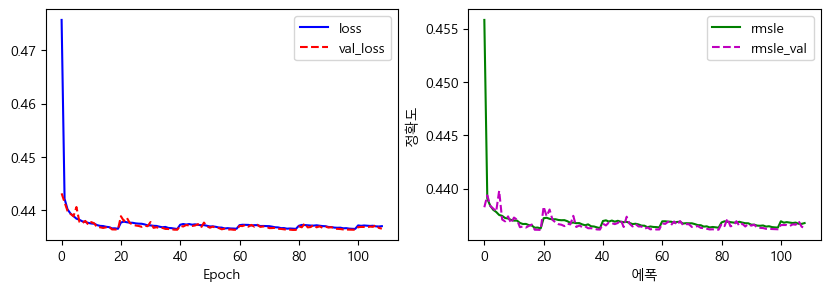

In [87]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10,3))

axes.flat[0].plot(history.history['loss'], 'b-', label='loss')
axes.flat[0].plot(history.history['val_loss'], 'r--', label='val_loss')
axes.flat[0].set_xlabel('Epoch')
axes.flat[0].legend()
axes.flat[1].plot(history.history['metric_fn'], 'g-', label='rmsle')
axes.flat[1].plot(history.history['val_metric_fn'], 'm--', label='rmsle_val')
axes.flat[1].set_xlabel("에폭")
axes.flat[1].set_ylabel("정확도")
axes.flat[1].legend()
plt.show()

In [16]:
# from sklearn.model_selection import KFold

# skf = KFold(n_splits=5, shuffle=True, random_state=8827)
# fold_histories = []
# tf_test_preds2 = np.zeros(len(test_x))

# for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
#     x_train_fold, x_valid_fold = train_x.iloc[train_index], train_x.iloc[valid_index]
#     y_train_fold, y_valid_fold = train_y.iloc[train_index], train_y.iloc[valid_index]
#     optimized_model = create_model(best_params['l1_reg'], best_params['l2_reg'], best_params['learning_rate'])
#     history = optimized_model.fit(
#         x_train_fold.astype('float32'), 
#         y_train_fold.astype('float32'),
#         epochs=20, 
#         batch_size=best_params['batch_size'], 
#         validation_data=(
#             x_valid_fold.astype('float32'),
#             y_valid_fold.astype('float32')
#         ),
#         callbacks=callbacks_list,
#         verbose=1,
#     )

#     fold_histories.append(history)
#     tf_test_preds2 += optimized_model.predict(test_x.astype('float32')).reshape(-1) / skf.n_splits

In [17]:
# xgb ALL dataset

from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb


params = {
    'objective': 'reg:squaredlogerror',
    'eta': 0.015, 
    'seed': 8332,
    'max_depth': 7,
    "alpha": 0.001,
    "lambda": 0.001,
    'subsample': 0.8,
    'nthread': 8,
    'eval_metric': 'rmsle'
}
# dtrain = xgb.DMatrix(train_x.values, label=train_y.values, feature_types=ft, enable_categorical=True)
dtrain = xgb.DMatrix(train_x.values, label=train_y.values, enable_categorical=True)
bst = xgb.train(params, dtrain, num_boost_round=3000, evals=[(dtrain, 'train')], verbose_eval=200, early_stopping_rounds=10)
xgb_test_pred = bst.predict(xgb.DMatrix(test_x))

[0]	train-rmsle:1.25627
[200]	train-rmsle:0.46765
[400]	train-rmsle:0.43604
[600]	train-rmsle:0.43482
[800]	train-rmsle:0.43393
[1000]	train-rmsle:0.43311
[1200]	train-rmsle:0.43234
[1400]	train-rmsle:0.43165
[1600]	train-rmsle:0.43098
[1800]	train-rmsle:0.43031
[2000]	train-rmsle:0.42967
[2200]	train-rmsle:0.42905
[2400]	train-rmsle:0.42846
[2600]	train-rmsle:0.42787
[2800]	train-rmsle:0.42729
[2999]	train-rmsle:0.42674


In [83]:
# xgb stratifiedKFold

params = {
    'objective': 'reg:squaredlogerror',
    'eta': 0.015, 
    "alpha": 0.0001,
    "lambda": 0.0001,
    'seed': 3663,
    'max_depth': 5,
    'subsample': 0.8,
    'nthread': 8,
    'eval_metric': 'rmsle'
}
# ft = [cat_to_str[col] for col in train_x.columns]
train_preds = np.zeros(len(train_x))
xgb_test_preds = np.zeros(len(test_x))
skf = KFold(n_splits=4, shuffle=True, random_state=3663)
# skf = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    dtrain = xgb.DMatrix(train_x.values[train_index], label=train_y.values[train_index], enable_categorical=True)
    dvalid = xgb.DMatrix(train_x.values[valid_index], label=train_y.values[valid_index], enable_categorical=True)
    bst = xgb.train(params, dtrain, num_boost_round=1200, evals=[(dtrain, 'train'), (dvalid, 'valid')], verbose_eval=200, early_stopping_rounds=10)
    train_preds[valid_index] = bst.predict(dvalid)

    xgb_test_preds += bst.predict(xgb.DMatrix(test_x)) / skf.n_splits

[0]	train-rmsle:1.25633	valid-rmsle:1.25602
[200]	train-rmsle:0.46828	valid-rmsle:0.46961
[400]	train-rmsle:0.43712	valid-rmsle:0.43903
[600]	train-rmsle:0.43625	valid-rmsle:0.43856
[800]	train-rmsle:0.43577	valid-rmsle:0.43841
[940]	train-rmsle:0.43548	valid-rmsle:0.43836
[0]	train-rmsle:1.25652	valid-rmsle:1.25549
[200]	train-rmsle:0.46913	valid-rmsle:0.46692
[400]	train-rmsle:0.43799	valid-rmsle:0.43629
[600]	train-rmsle:0.43713	valid-rmsle:0.43587
[800]	train-rmsle:0.43665	valid-rmsle:0.43578
[821]	train-rmsle:0.43660	valid-rmsle:0.43577
[0]	train-rmsle:1.25597	valid-rmsle:1.25728
[200]	train-rmsle:0.46851	valid-rmsle:0.46952
[400]	train-rmsle:0.43738	valid-rmsle:0.43829
[600]	train-rmsle:0.43652	valid-rmsle:0.43778
[800]	train-rmsle:0.43603	valid-rmsle:0.43766
[1000]	train-rmsle:0.43562	valid-rmsle:0.43759
[1027]	train-rmsle:0.43557	valid-rmsle:0.43759
[0]	train-rmsle:1.25626	valid-rmsle:1.25630
[200]	train-rmsle:0.46850	valid-rmsle:0.46907
[400]	train-rmsle:0.43732	valid-rmsle:0.

In [93]:
from catboost import CatBoostRegressor, Pool


train_preds = np.zeros(len(train_x))
cat_test_preds = np.zeros(len(test_x))

# skf = KFold(n_splits=5, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for i, (train_index, valid_index) in enumerate(skf.split(train_x, train_y)):
    dtrain = Pool(
        data=train_x.values[train_index], label=train_y.values[train_index]
    )
    dvalid = Pool(
        data=train_x.values[valid_index], label=train_y.values[valid_index]
    )
    bst = CatBoostRegressor(
        iterations=1000,
        objective="RMSE",
        learning_rate=0.01,
        l2_leaf_reg=6,
        depth=4,
        random_seed=42,
        subsample=0.8,
        bagging_temperature=0.23,
        od_type="Iter",
    )
    bst.fit(X=dtrain, eval_set=dvalid)
    
    cat_test_preds += bst.predict(Pool(test_x)) / skf.n_splits

0:	learn: 3.5982567	test: 3.5621427	best: 3.5621427 (0)	total: 60.5ms	remaining: 1m
1:	learn: 3.5968778	test: 3.5607462	best: 3.5607462 (1)	total: 79.5ms	remaining: 39.7s
2:	learn: 3.5955122	test: 3.5593624	best: 3.5593624 (2)	total: 97.3ms	remaining: 32.3s
3:	learn: 3.5942281	test: 3.5580710	best: 3.5580710 (3)	total: 115ms	remaining: 28.6s
4:	learn: 3.5929303	test: 3.5567627	best: 3.5567627 (4)	total: 133ms	remaining: 26.5s
5:	learn: 3.5916615	test: 3.5554807	best: 3.5554807 (5)	total: 151ms	remaining: 25s
6:	learn: 3.5904195	test: 3.5542244	best: 3.5542244 (6)	total: 174ms	remaining: 24.6s
7:	learn: 3.5892054	test: 3.5529969	best: 3.5529969 (7)	total: 191ms	remaining: 23.7s
8:	learn: 3.5879956	test: 3.5517834	best: 3.5517834 (8)	total: 209ms	remaining: 23s
9:	learn: 3.5867760	test: 3.5505491	best: 3.5505491 (9)	total: 229ms	remaining: 22.7s
10:	learn: 3.5855835	test: 3.5493422	best: 3.5493422 (10)	total: 247ms	remaining: 22.2s
11:	learn: 3.5844407	test: 3.5481920	best: 3.5481920 (11

In [88]:
# TF pred    24-48 : 4.049532610782032 / 36-72 : 4.048347499964718
print(tf_test_preds.mean())
tf_test_preds

4.048347499964718


array([3.92985159, 3.71493101, 4.82301062, ..., 4.70667779, 4.49036139,
       4.43509972])

In [24]:
# xgb ALL
print(xgb_test_pred.mean())
xgb_test_pred

4.025738


array([3.84707  , 3.0464227, 4.8500047, ..., 4.22768  , 4.8748264,
       4.6542416], dtype=float32)

In [118]:
# xgb strtf kfold
print(xgb_test_preds.mean())
xgb_test_preds

4.074137201282454


array([4.01979905, 3.70823753, 5.08908093, ..., 4.83283484, 4.70341599,
       4.60594785])

In [94]:
# cat strkf
print(cat_test_preds.mean())
cat_test_preds

4.63882155146081


array([4.60805142, 4.26357904, 5.82295173, ..., 5.69562748, 5.37399851,
       5.2220551 ])

In [27]:
asdfasdfasdfasdfasdfasdfasdfasdfasdf

NameError: name 'asdfasdfasdfasdfasdfasdfasdfasdfasdf' is not defined

In [115]:
# result_test_preds = (0.7 * tf_test_preds) + (0.1 * xgb_test_pred) + (0.2 * xgb_test_preds)
# result_test_preds = (0.3 * tf_test_preds) + (0.6 * xgb_test_pred) + (0.1 * xgb_test_preds) # 0.426254

# result_test_preds = (0.7 * tf_test_preds) + (0.1 * xgb_test_pred) + (0.2 * cat_test_preds)


result_test_preds = (0.35 * tf_test_preds) + (0.475 * xgb_test_pred +(0.15 * xgb_test_preds) + (0.025 * cat_test_preds))  # 0.42567
print(result_test_preds.mean())
result_test_preds

4.05623812699789


array([3.92097745, 3.41010177, 4.90074183, ..., 4.5228011 , 4.72703131,
       4.5844931 ])

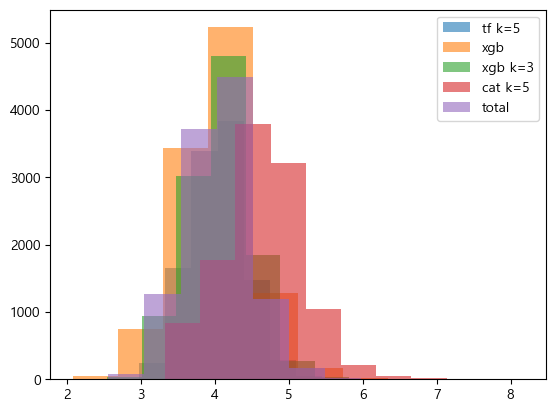

In [116]:
# fig, axes = plt.subplots(ncols=4, figsize=(10, 2))
plt.hist(tf_test_preds, alpha=0.6, label="tf k=5")
plt.hist(xgb_test_pred, alpha=0.6, label="xgb")
plt.hist(xgb_test_preds, alpha=0.6, label="xgb k=3")
plt.hist(cat_test_preds, alpha=0.6, label="cat k=5")
# plt.hist(tf_test_preds2, alpha=0.6, label="AE")
# plt.hist(poi_pred, alpha=0.6, label="Poisson")
# plt.hist(glm_pred, alpha=0.6, label="Gaussian")
plt.hist(result_test_preds, alpha=0.6, label="total")
plt.legend()
plt.show()

In [117]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission["ECLO"] = result_test_preds

sample_submission.to_csv("231208_tf5_xgb1_xgb3_cat5.csv", index=False)
sample_submission["ECLO"]

0        3.920977
1        3.410102
2        4.900742
3        4.373308
4        4.588601
           ...   
10958    5.459540
10959    4.367515
10960    4.522801
10961    4.727031
10962    4.584493
Name: ECLO, Length: 10963, dtype: float64